Credit Approval 

Source: https://archive.ics.uci.edu/dataset/27/credit+approval

A collection of variables that are taken into consideration for approving bank credits. The target feature in this case is whether or not a credit is approved, information which is found in the "ApprovalStatus" column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data has the following shape:

In [2]:
df = pd.read_csv("data/credit+approval/crx.data" , header=None)

print("number of observations : " , len(df))
print("number of variables : " , len(df.columns))

df.head()

number of observations :  690
number of variables :  16


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df_cols = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense','Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
df.columns = df_cols
df.head(25)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [4]:
df.tail(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,00400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,00000,0,-


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Given the distribution of values in the target feature, we can safely say that the data is balanced.

In [6]:
# check if data is balanced or imbalanced
counts_target = df['ApprovalStatus'].value_counts()

print(counts_target)

ApprovalStatus
-    383
+    307
Name: count, dtype: int64


We have both numerical and non-numerical values.

In [7]:
cat_cols = [ i for i in df.columns if df[i].dtype=='O']
print(cat_cols)
num_cols = [ i for i in df.columns if df[i].dtype!='O']
print(num_cols)

['Gender', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']
['Debt', 'YearsEmployed', 'CreditScore', 'Income']


In [8]:
df[num_cols].describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [9]:
df[cat_cols].describe()

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,ApprovalStatus
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [10]:
df['Gender'].unique()

array(['b', 'a', '?'], dtype=object)

In [11]:
df = df.replace('?', np.nan)

df['Age'] = df['Age'].astype('float64')
num_cols = [ i for i in df.columns if df[i].dtype!='O']
cat_cols = [ i for i in df.columns if (df[i].dtype =='O' and  i!='ApprovalStatus')]
print(num_cols)
print(cat_cols)

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


There are missing values present in the data, which will need to be handled with further in the analysis.

In [13]:
# missing values
missing_percentage = (np.sum(df.isnull())/len(df))*100
print(missing_percentage.sort_values(ascending=False))

ZipCode           1.884058
Gender            1.739130
Age               1.739130
EducationLevel    1.304348
Ethnicity         1.304348
Married           0.869565
BankCustomer      0.869565
Debt              0.000000
YearsEmployed     0.000000
PriorDefault      0.000000
Employed          0.000000
CreditScore       0.000000
DriversLicense    0.000000
Citizen           0.000000
Income            0.000000
ApprovalStatus    0.000000
dtype: float64


/Users/gulyasioan/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


On a first glimpse, we do not notice any significant correlation between the current numerical variables. Further investigation will be done as soon as the entire preprocessing has been done to the data.

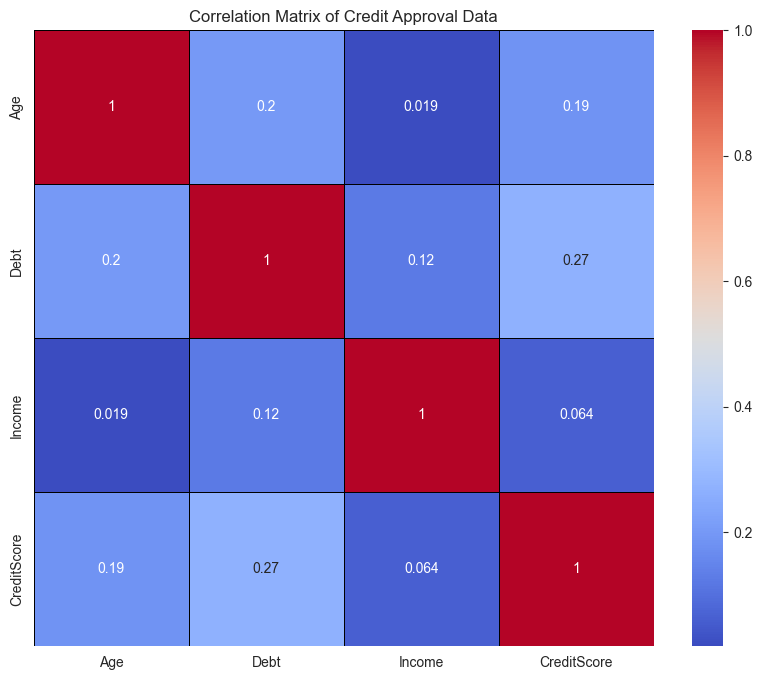

In [17]:
numerical_columns_cleaned = ['Age', 'Debt', 'Income', 'CreditScore']
correlation_matrix_cleaned = df[numerical_columns_cleaned].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Credit Approval Data')
plt.show()

In order to have a more visual overview, this function aims in quickly generationg histogram for each feature found in the data.

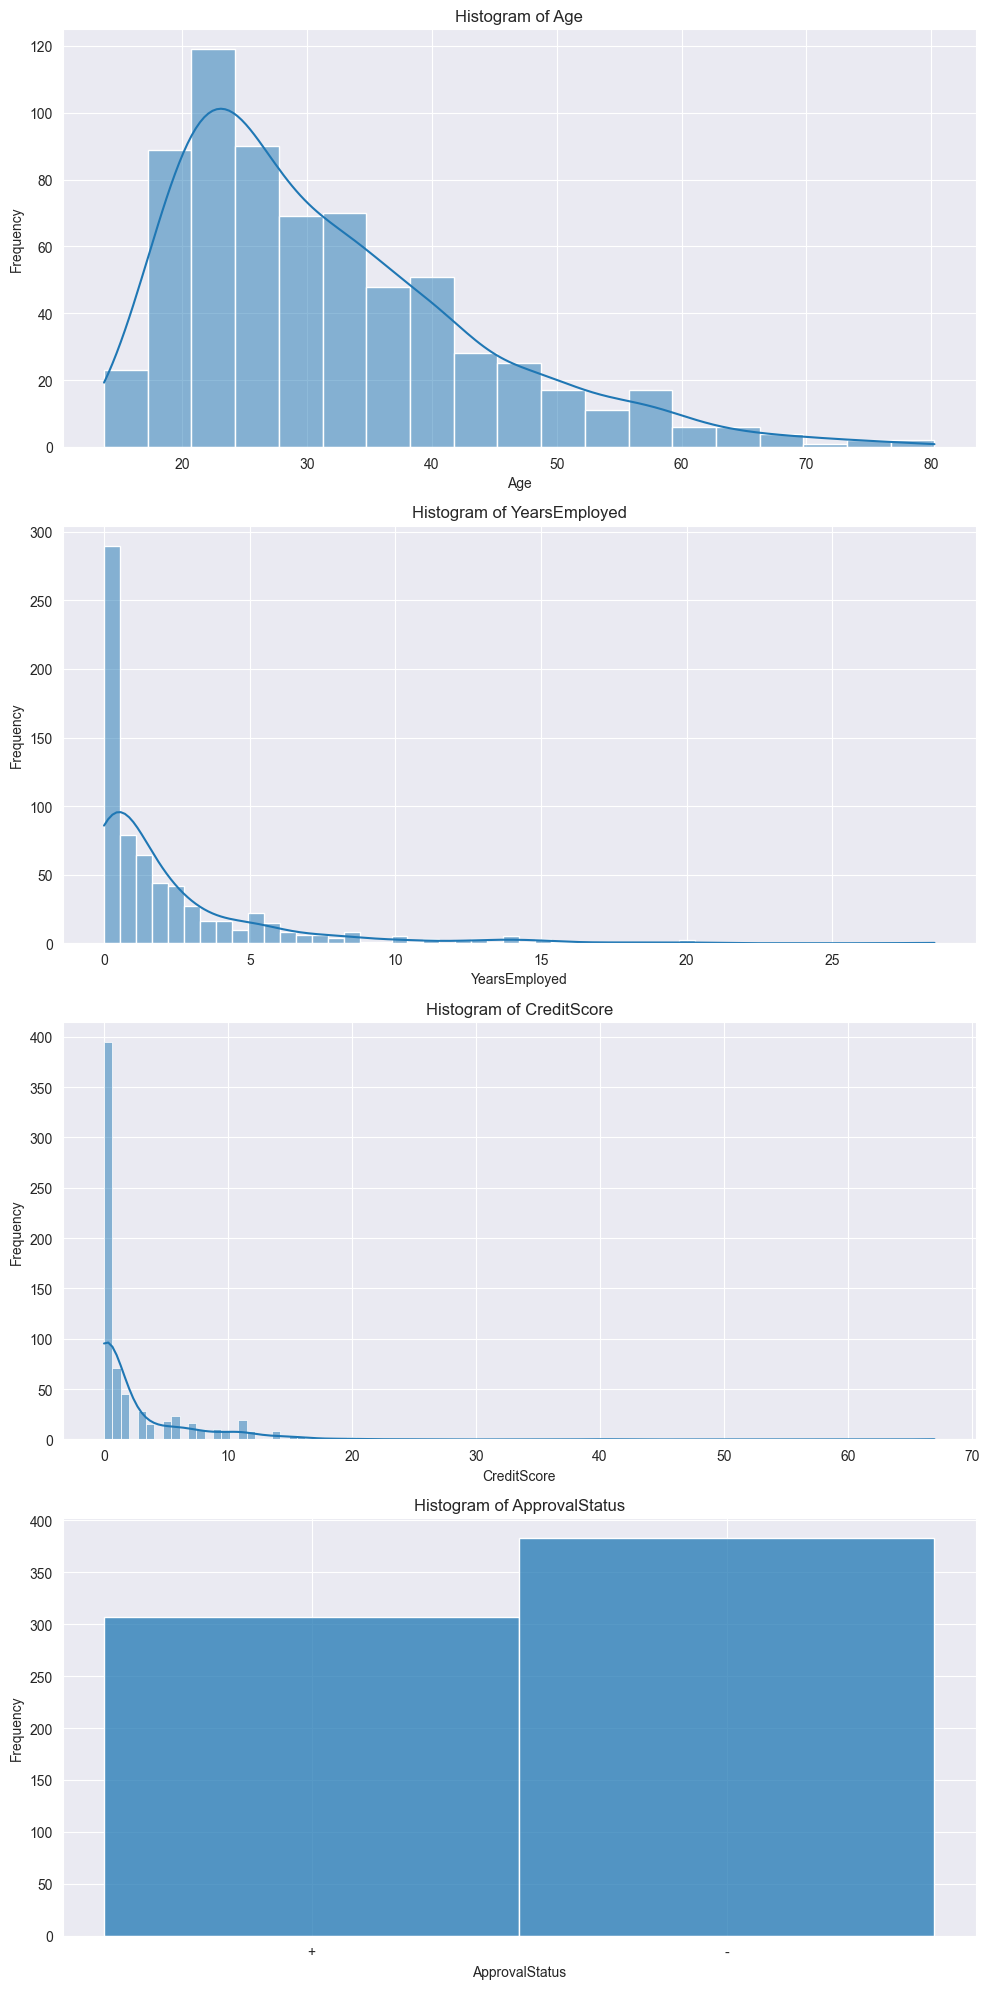

In [15]:
def plot_histograms(df, num_cols):
    """
    Function that creates histograms for predefined columns with the added funcitonality of detecting binary classification.
    """
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=num_plots, figsize=(10, 5 * num_plots))

    if num_plots == 1:
        axes = [axes]


    for ax, col in zip(axes, num_cols):
        unique_values = df[col].dropna().nunique()
        
        if unique_values == 2:
            sns.histplot(df[col].dropna(), ax=ax, kde=False)
        else:
            sns.histplot(df[col].dropna(), ax=ax, kde=True)
        
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histograms(df, ['Age', 'YearsEmployed', 'CreditScore', 'ApprovalStatus'])
